Warning: if importing BorutaShap throws an error, follow this steps to fix the import error
https://github.com/Ekeany/Boruta-Shap/issues/111

In [46]:
import joblib
from lightgbm import LGBMClassifier
import pandas as pd

In [47]:
experiment = "2023-04-24_204844"
best_params_path = f"../src/trained_models/{experiment}/study.joblib"
best_params = joblib.load(best_params_path).best_params

In [55]:
X_train = pd.read_csv("../X_train.csv", index_col=False).drop("Unnamed: 0", axis=1)
Y_train = (
    pd.read_csv("../Y_train.csv", index_col=False).drop("Unnamed: 0", axis=1).values
)

cat_cols = ["buying_mode", "status", "shippingmode", "seller_addressstate_name"]
X_train[cat_cols] = X_train[cat_cols].astype("category")

In [57]:
from BorutaShap import BorutaShap

Feature_selector = BorutaShap(
    importance_measure="shap", classification=True, model=LGBMClassifier(**best_params)
)
Feature_selector.fit(X=X_train, y=Y_train, n_trials=10, sample=False, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

18 attributes confirmed important: ['days_since_update', 'pic_min_size', 'pic_max_size', 'listing_type_id', 'pic_num_sizes', 'pic_num_items', 'initial_quantity', 'tag_good_qt', 'seller_id', 'nmp_tc', 'price', 'sold_quantity', 'category_id', 'shippingmode', 'available_quantity', 'nmp_qty', 'nmp_buyer', 'seller_antiq']
16 attributes confirmed unimportant: ['wknd_hlday_start_time', 'video_id', 'nmp_giro_postal', 'wknd_hlday_created', 'seller_id_cnt', 'nmp_cash', 'status', 'shippinglocal_pick_up', 'shippingfree_shipping', 'seller_addressstate_id', 'tag_dragg_bv', 'warranty', 'wknd_hlday_stop_time', 'currency_id', 'category_id_cnt', 'accepts_mercadopago']
6 tentative attributes remains: ['buying_mode', 'seller_addressstate_name', 'nmp_transf', 'days_elapsed', 'automatic_relist', 'seller_addresscity_id']


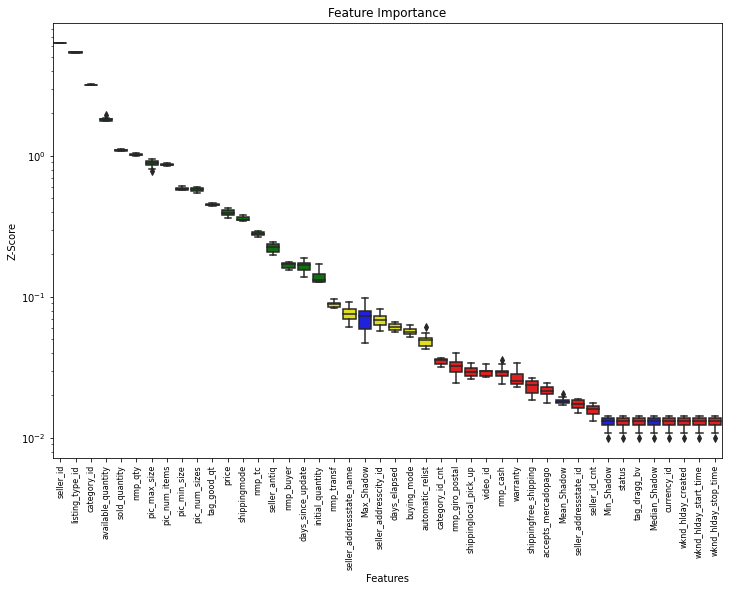

In [58]:
Feature_selector.plot(which_features="all")

In [61]:
Feature_selector.features_to_remove

array(['currency_id', 'video_id', 'shippinglocal_pick_up',
       'shippingfree_shipping', 'nmp_cash', 'nmp_giro_postal', 'warranty',
       'tag_dragg_bv', 'accepts_mercadopago', 'wknd_hlday_created',
       'wknd_hlday_start_time', 'wknd_hlday_stop_time',
       'seller_addressstate_id', 'status', 'seller_id_cnt',
       'category_id_cnt'], dtype=object)